## We analyze a dataset about vehicle registrations in Sweden.  The data contains passenger cars in use by region and type of ownership. Year 2002-2022

In [87]:
library(plyr)
library(dplyr)
library(tidyverse)
library(lubridate)
library(ggplot2)


In [88]:
data <- read_csv("vehicles.csv")

Rows: 5796 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Region, Vehicle_Type
dbl (2): Year, Number_of_Vehicles

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [89]:
head(data)

Region,Year,Number_of_Vehicles,Vehicle_Type
<chr>,<dbl>,<dbl>,<chr>
Stockholms län,2002,738471,passenger cars
Stockholms län,2003,746671,passenger cars
Stockholms län,2004,754266,passenger cars
Stockholms län,2005,759096,passenger cars
Stockholms län,2006,768957,passenger cars
Stockholms län,2007,783417,passenger cars


In [90]:
str(data)

spc_tbl_ [5,796 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Region            : chr [1:5796] "Stockholms län" "Stockholms län" "Stockholms län" "Stockholms län" ...
 $ Year              : num [1:5796] 2002 2003 2004 2005 2006 ...
 $ Number_of_Vehicles: num [1:5796] 738471 746671 754266 759096 768957 ...
 $ Vehicle_Type      : chr [1:5796] "passenger cars" "passenger cars" "passenger cars" "passenger cars" ...
 - attr(*, "spec")=
  .. cols(
  ..   Region = col_character(),
  ..   Year = col_double(),
  ..   Number_of_Vehicles = col_double(),
  ..   Vehicle_Type = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


## Checking if there is a missing value

In [91]:
sum(is.na(data))

[1] 0

In [92]:
sum(duplicated(data))

[1] 0

## calculating summary statistics for the variable "Number_of_Vehicles"

In [93]:
summary <- summary(data$Number_of_Vehicles)
summary

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0    268.5   2744.0  25448.9  14479.5 965722.0 

## We calculate and visualizes the distribution of the number of vehicles based on the vehicle type over the 21 years of records

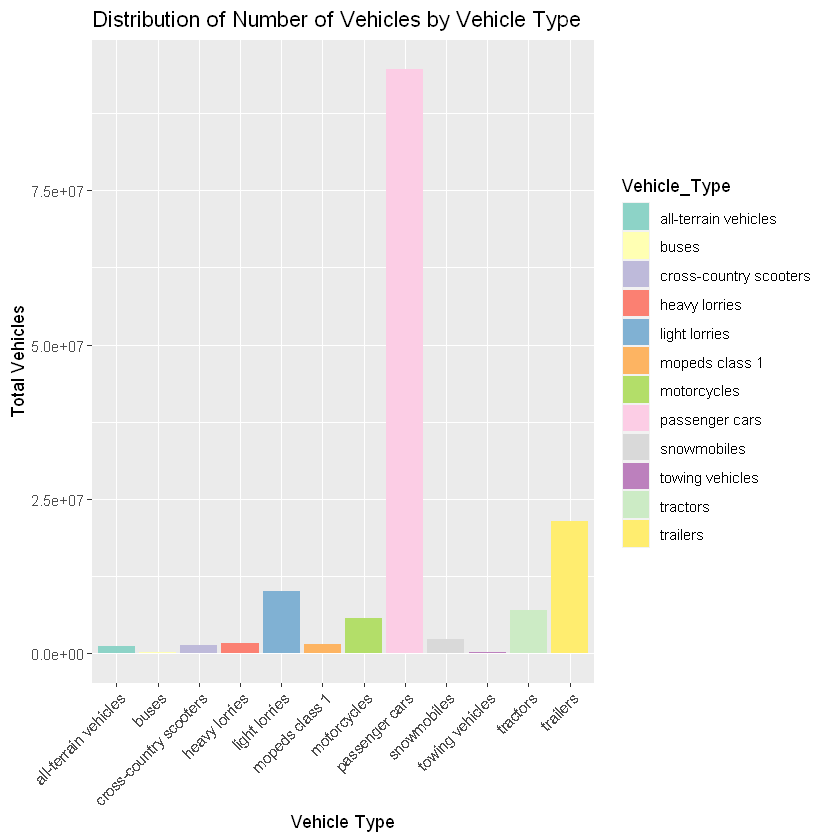

In [94]:
distribution <- data %>%
  group_by(Vehicle_Type) %>%
  summarize(Total_Vehicles = sum(Number_of_Vehicles))

ggplot(distribution, aes(x = Vehicle_Type, y = Total_Vehicles, fill = Vehicle_Type)) +
  geom_bar(stat = "identity") +
  labs(title = "Distribution of Number of Vehicles by Vehicle Type",
       x = "Vehicle Type",
       y = "Total Vehicles") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set3")

## What are the different vehicle types?

In [95]:
vehicle_types <- unique(data$Vehicle_Type)
print(vehicle_types)

 [1] "passenger cars"         "light lorries"          "heavy lorries"         
 [4] "towing vehicles"        "buses"                  "motorcycles"           
 [7] "mopeds class 1"         "tractors"               "snowmobiles"           
[10] "all-terrain vehicles"   "cross-country scooters" "trailers"              


## What are the locations contained within the dataset?

In [96]:
locations <- unique(data$Region)
print(locations)

 [1] "Stockholms län"          "Uppsala län"            
 [3] "Södermanlands län"       "Östergötlands län"      
 [5] "Jönköpings län"          "Kronobergs län"         
 [7] "Kalmar län"              "Gotlands län"           
 [9] "Blekinge län"            "Skåne län"              
[11] "Hallands län"            "Västra Götalands län"   
[13] "former Älvsborg county"  "former Skaraborg county"
[15] "Värmlands län"           "Örebro län"             
[17] "Västmanlands län"        "Dalarnas län"           
[19] "Gävleborgs län"          "Västernorrlands län"    
[21] "Jämtlands län"           "Västerbottens län"      
[23] "Norrbottens län"        


## calculating the total number of vehicles for each year

In [97]:
total_vehicles_by_year <- data %>%
  group_by(Year) %>%
  summarize(Total_Vehicles = sum(Number_of_Vehicles))

print(total_vehicles_by_year)

# A tibble: 21 × 2
    Year Total_Vehicles
   <dbl>          <dbl>
 1  2002        5909048
 2  2003        5988867
 3  2004        6109236
 4  2005        6249931
 5  2006        6391274
 6  2007        6534651
 7  2008        6609445
 8  2009        6673593
 9  2010        6739870
10  2011        6859724
# ℹ 11 more rows


## visualizing the trends in the number of vehicles over time using a line plot and area chart.

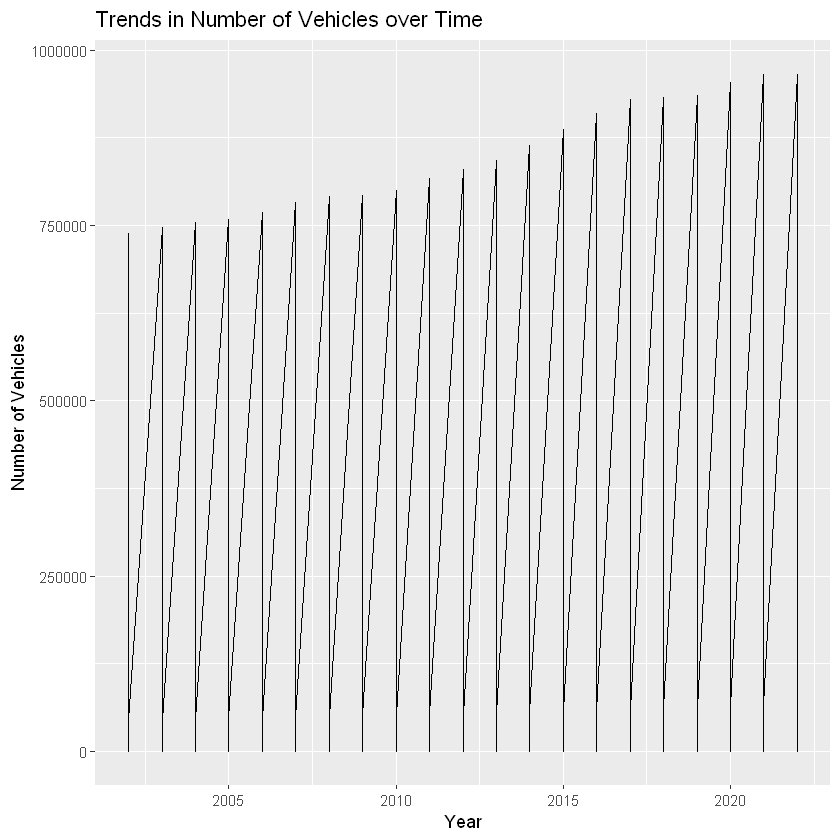

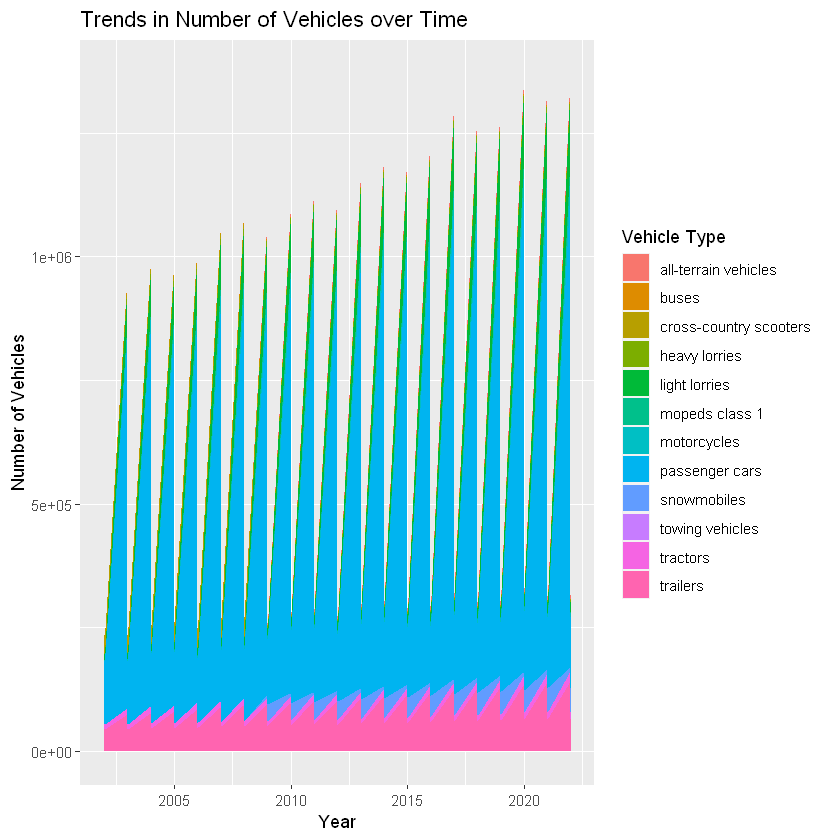

In [98]:
ggplot(data, aes(x = Year, y = Number_of_Vehicles)) +
  geom_line() +
  labs(x = "Year", y = "Number of Vehicles") +
  ggtitle("Trends in Number of Vehicles over Time")

ggplot(data, aes(x = Year, y = Number_of_Vehicles, fill = Vehicle_Type)) +
  geom_area() +
  labs(x = "Year", y = "Number of Vehicles") +
  ggtitle("Trends in Number of Vehicles over Time") +
  scale_fill_discrete(name = "Vehicle Type")


In [99]:
library(tidyverse)
library(modelr)
library(palmerpenguins)
penguins <- drop_na(penguins)

## We generate a scatter plot with linear regression lines for the number of vehicles by year in Jönköping

In [100]:
 jonkoping <- data %>%
  filter(Region == "Jönköpings län")

In [101]:
 print(jonkoping)

# A tibble: 252 × 4
   Region          Year Number_of_Vehicles Vehicle_Type  
   <chr>          <dbl>              <dbl> <chr>         
 1 Jönköpings län  2002             154012 passenger cars
 2 Jönköpings län  2003             155632 passenger cars
 3 Jönköpings län  2004             157190 passenger cars
 4 Jönköpings län  2005             158956 passenger cars
 5 Jönköpings län  2006             161191 passenger cars
 6 Jönköpings län  2007             163519 passenger cars
 7 Jönköpings län  2008             164027 passenger cars
 8 Jönköpings län  2009             164309 passenger cars
 9 Jönköpings län  2010             165865 passenger cars
10 Jönköpings län  2011             168322 passenger cars
# ℹ 242 more rows


In [102]:
colnames(jonkoping)

[1] "Region"             "Year"               "Number_of_Vehicles"
[4] "Vehicle_Type"

In [103]:
unique(jonkoping$Vehicle_Type)


[1] "passenger cars"         "light lorries"          "heavy lorries"         
 [4] "towing vehicles"        "buses"                  "motorcycles"           
 [7] "mopeds class 1"         "tractors"               "snowmobiles"           
[10] "all-terrain vehicles"   "cross-country scooters" "trailers"

`geom_smooth()` using formula = 'y ~ x'


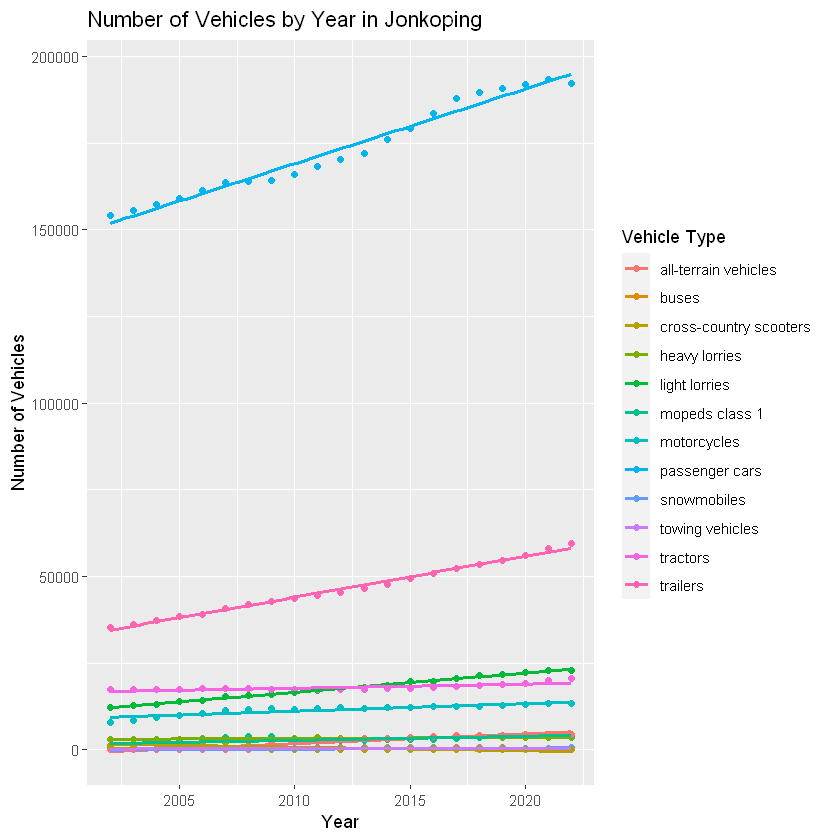

In [104]:
ggplot(jonkoping, aes(x = Year, y = Number_of_Vehicles, color = Vehicle_Type)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Year", y = "Number of Vehicles", title = "Number of Vehicles by Year in Jonkoping") +
  scale_color_discrete(name = "Vehicle Type")

In [105]:
library(randomForest)
library(caret)
library(Metrics)

## Train a linear regression model

In [106]:
data <- data %>%
  select(Year, Region, Vehicle_Type, Number_of_Vehicles) 
data <- na.omit(data)  # Remove rows with missing values

# Convert categorical variables to factors
data$Region <- as.factor(data$Region)
data$Vehicle_Type <- as.factor(data$Vehicle_Type)

# Split the data into training and testing sets
set.seed(123)  # Set random seed for reproducibility
train_indices <- createDataPartition(data$Number_of_Vehicles, p = 0.7, list = FALSE)
train_data <- data[train_indices, ]
test_data <- data[-train_indices, ]

# Train the linear regression model
model <- lm(Number_of_Vehicles ~ Year + Region + Vehicle_Type, data = train_data)

predictions <- predict(model, newdata = test_data)

accuracy <- caret::RMSE(predictions, test_data$Number_of_Vehicles)
print(paste("Root Mean Squared Error (RMSE):", accuracy))

[1] "Root Mean Squared Error (RMSE): 53148.967126601"


## we predict the number of vehicles given a year, region, and vehicle type

In [107]:
model <- lm(Number_of_Vehicles ~ Year + Region + Vehicle_Type, data = data)

# Define the input values for prediction
year <- 2023
region <- "Stockholms län"
vehicle_type <- "passenger cars"

# Create a new data frame with the input values
new_data <- data.frame(Year = year, Region = region, Vehicle_Type = vehicle_type)

prediction <- predict(model, newdata = new_data)

print(paste("Predicted number of vehicles:", prediction))

[1] "Predicted number of vehicles: 270837.777208403"
